In [47]:
import pandas as pd
import random
import uuid
import numpy as np

import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})

In [2]:
countries = ['CHN', 'IND', 'USA', 'IDN', 'PAK', 'BRA', 'NGA', 'BGD', 'RUS', 'JPN', 'MEX', 'ETH', 'PHL', 
 'EGY', 'VNM', 'COD', 'DEU', 'TUR', 'IRN', 'THA', 'FRA', 'GBR', 'ITA', 'ZAF', 'TZA', 'MMR', 
 'KOR', 'KEN', 'COL', 'ESP', 'UKR', 'ARG', 'UGA', 'DZA', 'SDN', 'IRQ', 'POL', 'AFG', 'CAN', 
 'MAR', 'SAU', 'UZB', 'PER', 'MYS', 'AGO', 'GHA', 'MOZ', 'VEN', 'YEM', 'NPL', 'MDG', 'PRK', 
 'CMR', 'CIV', 'AUS', 'TWN', 'NER', 'LKA', 'BFA', 'ROU', 'MLI', 'CHL', 'KAZ', 'MWI', 'ZMB', 
 'GTM', 'NLD', 'ECU', 'SYR', 'KHM', 'SEN', 'TCD', 'SOM', 'ZWE', 'GIN', 'RWA', 'TUN', 'BEN', 
 'BEL', 'BOL', 'CUB', 'BDI', 'HTI', 'GRC', 'DOM', 'CZE', 'PRT', 'SWE', 'JOR', 'AZE', 'HUN', 
 'ARE', 'HND', 'BLR', 'TJK', 'ISR', 'AUT', 'PNG', 'CHE']

poss_tags = ['Science', 'Technology', 'Religion', 'Politics', 'Food', 'Finance']

In [3]:
tags = [list(set([random.choice(poss_tags) for x in range(1,random.choice(range(2,len(poss_tags))))])) for y in range(0,100)]
country_tags = [list(set([random.choice(countries) for x in range(1,random.choice(range(2,10)))])) for y in range(0,100)]
GUIDs = [str(uuid.uuid4()) for x in range(0,100)]

In [4]:
df = pd.DataFrame(data=[GUIDs, tags, country_tags]).transpose().rename(columns={0:'GUID', 1:'Tags', 2:'Countries'})

In [5]:
df1 = df.explode('Tags')
df2 = df.explode('Countries')
df3 = df.explode('Countries').explode('Tags')

In [6]:
df3

,GUID,Tags,Countries
0,1e084ab5-d549-40cb-ae0e-b0eb40f369d4,Politics,BLR
0,1e084ab5-d549-40cb-ae0e-b0eb40f369d4,Technology,BLR
0,1e084ab5-d549-40cb-ae0e-b0eb40f369d4,Religion,BLR
0,1e084ab5-d549-40cb-ae0e-b0eb40f369d4,Science,BLR
1,8c551d08-1141-484b-9dce-1a18aaebb0be,Politics,POL
...,...,...,...
98,371e4294-90ac-4368-8a55-a5cf722fed9a,Food,RUS
99,c7a63133-cfad-4247-8d9b-47a3fdf9f5fe,Politics,DZA
99,c7a63133-cfad-4247-8d9b-47a3fdf9f5fe,Technology,DZA
99,c7a63133-cfad-4247-8d9b-47a3fdf9f5fe,Religion,DZA


In [42]:
df_pivot = (df3.pivot_table(index='Tags', columns='Countries', values='GUID',
               aggfunc='count', fill_value=0, margins=True)   # pivot with margins 

            ## Swap these if you want the sorting to be different
            .sort_values('All', ascending=False, axis=1) # sort by column sum
            .drop('All')    # drop row `All`

            ## Swap these if you want the sorting to be different
            .sort_values('All', ascending=False)  # sort by row sum
            .drop('All', axis=1)                  # drop column `All`           
)

In [43]:
assert len(df3[df3['Countries']=='IRN']) == df_pivot['IRN'].sum()
assert len(df3[df3['Countries']=='BEL']) == df_pivot['BEL'].sum()
assert len(df3[df3['Countries']=='CZE']) == df_pivot['CZE'].sum()

In [44]:
df_pivot

Countries,IRN,BEL,USA,CZE,PER,ZAF,CAN,TUR,BDI,CUB,...,BOL,AFG,GRC,RWA,CIV,CHN,DEU,ESP,POL,ARG
Tags,,,,,,,,,,,,,,,,,,,,,
Religion,2,3,1,4,4,5,4,2,3,5,...,0,1,0,0,0,1,0,0,1,0
Science,5,4,4,3,2,4,3,3,5,5,...,0,1,1,1,0,0,1,0,0,0
Food,5,3,5,2,1,2,2,2,3,1,...,0,1,1,2,1,0,0,2,0,0
Technology,3,3,3,4,3,3,2,3,2,3,...,1,0,1,0,0,1,0,0,1,0
Politics,4,6,2,3,3,3,3,3,2,2,...,1,1,1,0,1,1,1,1,1,1
Finance,4,2,4,3,5,1,4,4,2,1,...,2,0,0,1,1,0,1,0,0,1


<AxesSubplot:xlabel='Countries', ylabel='Tags'>

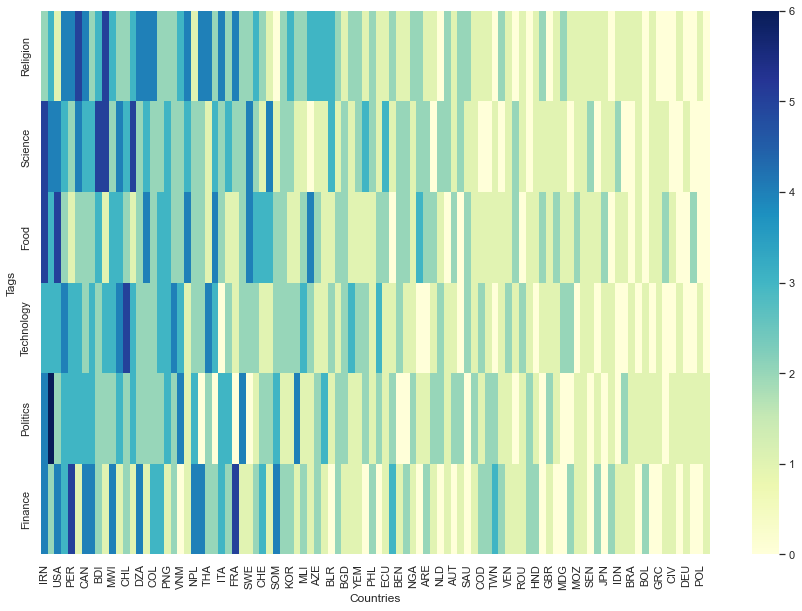

In [48]:
sns.heatmap(df_pivot, cmap="YlGnBu")

## Below this point it's just messing around

-------

In [7]:
df4 = df3.pivot_table(index="Tags", columns='Countries', values="GUID", aggfunc='count', fill_value=0)

In [8]:
df4

Countries,AFG,AGO,ARE,ARG,AUS,AUT,AZE,BDI,BEL,BEN,...,UGA,UKR,USA,UZB,VEN,VNM,YEM,ZAF,ZMB,ZWE
Tags,,,,,,,,,,,,,,,,,,,,,
Finance,0,2,2,1,1,0,2,2,2,1,...,1,2,4,2,1,0,1,1,0,2
Food,1,1,2,0,0,2,2,3,3,2,...,2,1,5,3,1,2,1,2,1,4
Politics,1,0,1,1,1,2,2,2,6,0,...,0,3,2,1,1,4,1,3,1,0
Religion,1,1,1,0,2,1,3,3,3,1,...,0,2,1,3,1,3,2,5,1,2
Science,1,0,2,0,2,1,1,5,4,2,...,2,3,4,2,1,2,2,4,1,3
Technology,0,2,0,0,1,1,1,2,3,2,...,1,2,3,2,2,3,2,3,0,3


In [13]:
## This is cool, but it jacks up your columns
# df5 = pd.DataFrame(-np.sort(-df4.values, axis=0), index=df4.index, columns=df4.columns)

In [14]:
df5

Countries,AFG,AGO,ARE,ARG,AUS,AUT,AZE,BDI,BEL,BEN,...,UGA,UKR,USA,UZB,VEN,VNM,YEM,ZAF,ZMB,ZWE
Tags,,,,,,,,,,,,,,,,,,,,,
Finance,1,2,2,1,2,2,3,5,6,2,...,2,3,5,3,2,4,2,5,1,4
Food,1,2,2,1,2,2,2,3,4,2,...,2,3,4,3,1,3,2,4,1,3
Politics,1,1,2,0,1,1,2,3,3,2,...,1,2,4,2,1,3,2,3,1,3
Religion,1,1,1,0,1,1,2,2,3,1,...,1,2,3,2,1,2,1,3,1,2
Science,0,0,1,0,1,1,1,2,3,1,...,0,2,2,2,1,2,1,2,0,2
Technology,0,0,0,0,0,0,1,2,2,0,...,0,1,1,1,1,0,1,1,0,0


In [ ]:
df6 = df5.T

In [ ]:
df7 = pd.DataFrame(-np.sort(-df6.values, axis=0), index=df6.index, columns=df6.columns)

In [ ]:
df5.sort_values(axis=1)

In [ ]:
ax = sns.heatmap(df4)

In [ ]:
ax = sns.heatmap(df5)

In [ ]:
ax = sns.heatmap(df7)

In [ ]:
df7

In [ ]:
df4['AFG']

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15, 30))
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.xaxis.set_label_position('top')
sns.heatmap(df7, annot=True, fmt="d", linewidths=.5, ax=ax)

In [ ]:
g = sns.jointplot(data=df7, x='Countries', y='Tags', kind='hist')